In [1]:
#Librerias
import pandas as pd #Permite leer el CSV
import numpy as np  #Permite trabajar con arreglos de pandas y usar nan
import matplotlib.pyplot as plt #Permite graficar
import os   #Permite interactuar con las rutas de la pc
import math as mt # Permite hacer comparaciones logicas
from itertools import groupby #Para una funcion
from operator import itemgetter #Para una función
import csv
from datetime import datetime
from sklearn.linear_model import LinearRegression
import random

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
class d03():
    
    def __init__(self, datafile='O3 CDMX 1986-2018 all sites.csv'):
        """Carga el archivo que contiene los datos de las estaciones"""
        try:
            self.dt = pd.read_csv(datafile)
            print("Datos exportados")
        except:
            print("Datos no exportados")
    
    def exportDB(self, estacion, v = [50,25,25],n = 0):
        """Crea un csv de cada estación que contiene el archivo original
        siguiendo el siguiente encabezado
        |FECHA|DATO MEDIDO|isNull|TRAIN|Test|Test2|"""
        #Usado para tomar menos datos de los que contiene el archivo
        if estacion in self.dt.keys():

            if n == 0:
                n = len(self.dt[estacion])

            #Crea el nuevo archivo
            file = open('./CSVfiles/format_%s.csv'%estacion,'w')
            file.write('date,x_i,isNull,Train,Test,Test2\n')

            tmp = self.dt
            i = 0
            a = [1,0,0];b = [0,1,0];c = [0,0,1]
            aux = 0 

            for i in range(len(v)):
    #            print(a[i],b[i],c[i])
    #            print(aux,aux+round(n*(v[i]/100))-1)
                for elemento in range(aux,aux+round(n*(v[i]/100))-1):
                    file.write('{},{},{},{},{},{}\n'.
                               format(tmp['date'][elemento],tmp[estacion][elemento],
                                     mt.isnan(tmp[estacion][elemento]),
                                     a[i],b[i],c[i]))
                aux += round(n*(v[i]/100))
            print('Datos de la estacción %s exportados'%estacion)
            file.close()
            print('Archivo creado')
            
        else:
            print('Estación no encontrada')
                      
        
    def exportA(self):
        """Crea un CSV de todas las estaciones que se encuentran en el archivo"""
        
        print("Exportando todas las estación")
        print("Esto puede tardar un tiempo")
        for estacion in self.dt.keys()[1:]:
            print("Exportando los datos de la estación %s"%estacion)
            self.exportDB(estacion)
            print("Datos de la estación %s exportados"%estacion)   
    
    
    def Hplot(self,estacion, file = False):
        """A la vez que crea un archivo en el cual incluye la ubicación de los
        huecos, la cantidad de huecos, imprime un histograma y una gráfica
        tipo pie donde hace una relación de los datos existentes vs los datos faltates"""
        if estacion in self.dt.keys():
            try:
                dt = pd.read_csv('./CSVfiles/format_%s.csv'%estacion)
                self.exportH(dt['isNull'],estacion)
                dh = pd.read_csv('./CSVfiles/hist_%s.csv'%estacion)
                plt.figure(figsize=[10,10])
                plt.subplot(2,1,1)
                plt.title('Relación de datos faltantes')
                plt.pie(self.Nnan(dt['isNull']),labels=['Datos','NAN'],explode=(0.1,0))
                plt.subplot(2,1,2)
                plt.title('Histograma de huecos')
                plt.xlabel('Número de huecos')
                plt.ylabel('Cantidad de huecos')
                plt.hist(dh['Size'])
            except:
                print('No existe un documento de la estación.\n Crea uno usando la función exportDB')
        else:
            print('Estación no valida')
            
        
    def exportH(self,array,estacion):
        """La entrada debe ser un array de booleanos, la salida indica
        la posición de los booleanos positivos y la cantidad de ellos"""
        f = open(r'./CSVfiles/hist_%s.csv'%estacion,'w')
        f.write('PosIni,PosFin,Size\n')
        count = 0
        ini = 0
        fin = 0
        for pos in range(len(array)):
            if array[pos]:
                if count == 0:
                    ini = pos
                count += 1
            else:
                if count != 0:
                    fin = pos - 1
                    f.write('{},{},{}\n'.format(ini,fin,count))
                count = 0
        if count != 0:
            fin = len(array)-1
            f.write('{},{},{}\n'.format(ini,fin,count))
        f.close()
                
            
    def Nnan(self,array):
        """Normaliza la cantidad de datos"""
        s = len(array)
        sn = 0
        for elemento in array:
            if elemento:
                sn+=1
        sn = (sn/s)*100
        s = 100 - sn
        return([s,sn])
    


In [5]:
cdmx = d03()

Datos exportados


In [8]:
cdmx.exportDB('PED',n=200)

Datos de la estacción PED exportados
Archivo creado


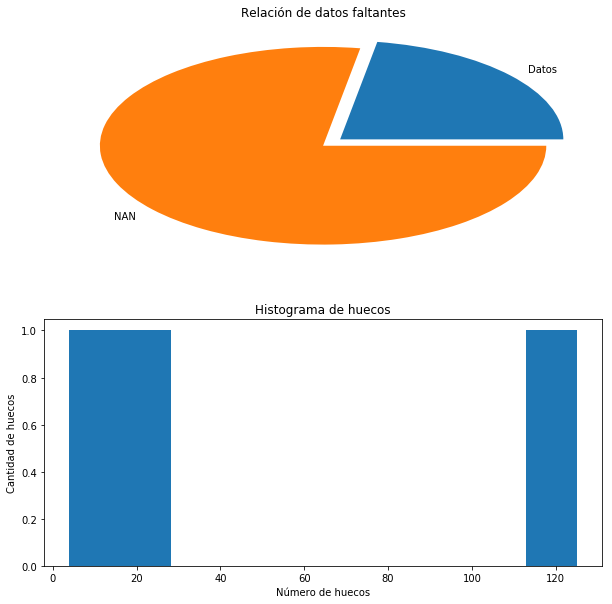

In [9]:
cdmx.Hplot('PED')

Primero se crea un conjunto de datos con la funci+on f
Despues se crean huecos de tamaño 1
Se crea un subconjunto de datos y se le ggeneran huecos de tamaño 1
Se busca en el primer conjunto los valores para rellenar los huecos y se almacena el valor anterior al hueco, el que le sigue y el valor con el que se rellena
Después se hace una regresión lineal para llenar los huecos del segundo conjunto con huecos.

En las gráficas se ve el proocedimiento gráfico

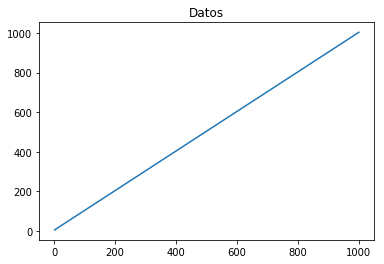

Quitar 15
Quitar 26
Quitar 38
Quitar 51
Quitar 65
Quitar 80
Quitar 96
Quitar 113
Quitar 131
Quitar 150
Quitar 170
Quitar 191
Quitar 213
Quitar 236
Quitar 260
Quitar 285
Quitar 311
Quitar 338
Quitar 366
Quitar 395


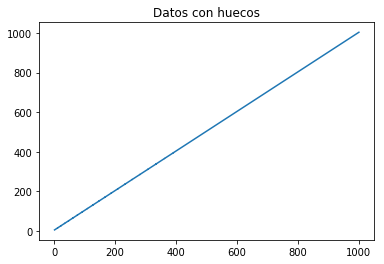

3
7
12
18
25


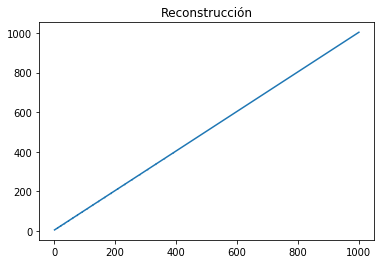

coefficient of determination: 1.0
intercept: -2.000000000000057
slope: [0.5 0.5]
predicted response:
[ 13.  24.  36.  49.  63.  78.  94. 111. 129. 148. 168. 189. 211. 234.
 258. 283. 309. 336. 364. 393.]
predicted response:
[ 13.  24.  36.  49.  63.  78.  94. 111. 129. 148. 168. 189. 211. 234.
 258. 283. 309. 336. 364. 393.]


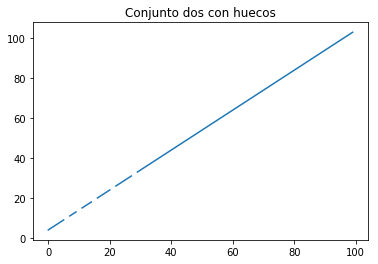

5
nan
10.000000000000004
nan
14.000000000000007
nan
19.000000000000007
nan
25.000000000000014
nan
32.000000000000014


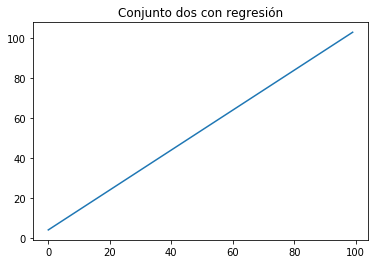

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#def f(x):
 #   x = x/(2*3.14159)+0.3
#    return(np.sin(x)*np.cos(x%0.12)/(x))

def f(x):
    return(x+4)

#Datos generados
x = list(range(1,1001))
y = [f(xi) for xi in x]
yt = [f(xi) for xi in range(100)]

plt.figure()
plt.title("Datos")
plt.plot(x,y)
plt.show()

import matplotlib.pyplot as plt
import random
import math as mt
posH = []
n=0

#Huecos generados
m = random.randrange(20)
for i in range(20):
    n+=i+m
    print("Quitar",y[n])
    y[n] = np.nan
    posH.append(n)
    
plt.figure()
plt.title("Datos con huecos")
plt.plot(x,y)
plt.show()
posHt = []
n = 0
m = random.randrange(10)

for i in range(5):
    n += i+m
    print(n)
    yt[n + 3] = np.nan
    posHt.append(n+3)
    

#Comparar y guardar el indice
dmin = 100
dtmp = 0
i = 0
index = []
indexn = 0

for pos in posH:
    i = 0
    dmin = 100
    while(i < len(y)-1):
        #print(y[i])
        if mt.isnan(y[i]):
            i += 2
        elif(mt.isnan(y[i-1]) or mt.isnan(y[i+1])):
            #print(y[i-1],y[i+1])
            i += 1
        else:
            #print("Indice {}, tamaño {}".format(i+1,len(y)))
            dtmp = ((y[pos-1] - y[i-1])**2 + (y[pos+1]-y[i+1])**2)**1/2
            if dtmp < dmin:
                dmin = dtmp
                #print(dmin, i-1,i+1)
                #print(i)
                indexn = i

            i+=1
            #print(pos,i)
    index.append(indexn)

for i in range(len(index)):
    y[posH[i]] = y[index[i]]

plt.figure()
plt.title("Reconstrucción")
plt.plot(x,y)
plt.show()

X = [] #[A,D]
R = []


for i in posH:
    X.append([y[i-1],y[i+1]])
    R.append(y[i])
    if(mt.isnan(y[i]) or mt.isnan(y[i-1]) or mt.isnan(y[i+1])):
        print(y[i],y[i-1],y[i+1])
    
from sklearn.linear_model import LinearRegression

x, y = np.array(X), np.array(R)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)

print('predicted response:', y_pred, sep='\n')

plt.figure()
plt.title("Conjunto dos con huecos")
plt.plot(list(range(100)),yt)
plt.show()

x_new = []

for i in range(5):
    x_new.append([yt[posHt[i]-1],yt[posHt[i]+1]])

y_new = model.predict(x_new)
print(len(y_new))

for i in range(len(y_new)):
    print(yt[posHt[i]])
    yt[posHt[i]] = y_new[i] + abs(model.intercept_)
    print(yt[posHt[i]])
    
plt.figure()
plt.title("Conjunto dos con regresión")
plt.plot(list(range(100)),yt)
plt.show()

In [31]:
def invec(v):
    return([v[len(v) - item - 1] for item in range(len(v))])

def VMask(h,tau,m):
    """Una función que crea un vector con ceros y unos
        de acuerdo a un vectir de huecos [h], frecuencia tau
        y un tamaño m. A la sialida un vector de tamaño 2m + len(h)"""
    
    a = list() #Crea una lista para almacenar valores 0,1
    j = i = 0
    vh = [0 for k in range(h)] # crea un vector de ceros
    print(vh)
    
    #for i in range(0,m): #Crea un vector de tamaño m con valores 0,1
    #    if i%tau == 0: #El modulo determina la posición de los unos
    #        a.append(1)
    #    else:
    #        a.append(0)
    while(j != m):
        if i%tau == 0:
            a.append(1)
            j += 1
        else:
            a.append(0)
        i += 1
            
    c = list() #Se crea el vector final, compuesto por un lado con el vector a, después el hueco, despues el vector a
    [c.append(item) for item in invec(a)]
    [c.append(item) for item in vh]
    [c.append(item) for item in a]
    
    #Se regrsa el vector final
    return c

def doZero(vector):
    """Hace ceros los elementos nan"""
    aux = list()
    for elemento in vector:
        if mt.isnan(elemento):
            aux.append(0)
        else:
            aux.append(elemento)
    return aux

def getBestVec(Datos, VecH, Mascara):
    """Dada un vector con un hueco determinado por una mascara
    se busca entre los datos aquel que sea el mejor vector"""
    minV = int(np.matrix(doZero(VecH))*np.matrix(doZero(VecH)).transpose())#valor minimo inicial
    #print(minV)
    vec = None #Mejor vector asociado al minimo
    #Para que inicie la función el tamaño de la mascara debe ser 
    #igual al tamaño del vector buscado     
    if len(VecH) != len(Mascara):
        return False
    else:     
        #Buscamos entre todos los datos, la condición permite obtener
        #vectores de tamaño de la mascara y nos detiene cuando salgamos del tamaño
        #del vector de datos
        i = 0 #Posición inicial
        while(i+len(Mascara) < len(Datos)):
            #Primero verificamos que el vector no tenga nan
            if(mt.isnan(np.linalg.norm(Datos[i:i+len(Mascara)]))):
                i += 1
            else:
                #De no tener nan multiplicamos por la mascara para quedarnos
                #solo con los elementos que nos importan
                aux = np.array(Datos[i:i+len(Mascara)]) * np.array(Mascara)
                #print(aux)
                #multiplicamos por el vector con hueco
                tmp = doZero(VecH)
                v = int(np.matrix(aux)*np.matrix(tmp).transpose())
                #print(v)
                if v <= minV:
                    vec = Datos[i:i+len(Mascara)]
                    i+=1
                else:
                    i+=1
                    
        return vec
                

In [38]:
VecH = [3,np.nan,5]
Datos = list(range(51))
Mascara = VMask(1,5,3)
print(Mascara)
#print(VecH)
#print(getBestVec(Datos,VecH,Mascara))

[0]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


In [39]:
file = pd.read_csv('./CSVfiles/format_PED.csv')
VecH = [21,np.nan,9] #espera[143,258,334]
Datos = list(file.get('x_i'))
Mascara = VMask([0],1,1)

print(getBestVec(Datos,VecH,Mascara))

[7.0, 8.0, 22.0]
